# Importar librerias

- pandas
- matplotlib.pyplot
- seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as stats

# Cargar datos

Cargar el archivo `mediciones.csv`

In [2]:
mediciones= pd.read_csv('mediciones.csv',sep=' ')

Ver que tipo de datos contiene

In [3]:
mediciones.head()


,tiempo,voltaje
0,2.068966,9.53
1,4.137931,9.51
2,6.206897,9.49
3,8.275862,9.48
4,10.344828,9.50


*Q-Q PLOT*

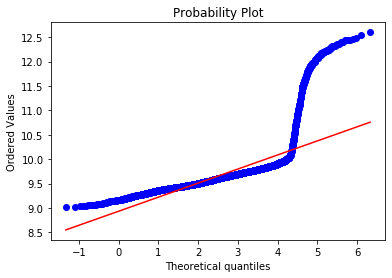

In [4]:
stats.probplot(mediciones.voltaje, dist="norm", sparams=(2.5,),plot=plt)
plt.show()

*Test Kolmogorov-Smirnov* 

In [5]:
stats.kstest(mediciones.voltaje, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

# Outliers

## Metodo intercuantil

Calcular:
-  Q1 y Q3
- IQR
- Q1 - 1.5 * IQR
- Q3 + 1.5 * IQR

In [6]:
# vamos a hacer en un solo paso este cálculo
# para todas las variables en el data frame

Q1 = mediciones["voltaje"].quantile(0.25)
Q3 = mediciones["voltaje"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Q1 = np.percentile( mediciones["voltaje"], 25)
Q3 = np.percentile( mediciones["voltaje"], 75)
IQR = Q3 - Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print("Umbral menor: ", Q1 - IQR*1.5)
print("Umbral mayor: ", Q3 + IQR*1.5)

0.25
Q1:  9.48
Q3:  9.73
IQR:  0.25
Umbral menor:  9.105
Umbral mayor:  10.105


Cuantos outliers hay en total (puntos mas alla de los "bigotes")

In [7]:
# para ver cuántos outliers identificamos
outliers_df = (mediciones.voltaje < (Q1 - 1.5 * IQR)) |(mediciones.voltaje> (Q3 + 1.5 * IQR))
outliers_df.sum()

381

### Z-Score

Sea una variable $X$ tal que sige una distribución de tipo Normal con media $\mu$ y desviación estándar $\sigma$. Es decir:

$$X \sim N(\mu,\sigma)$$

Comunmente se representa con el nombre Z a la variable estandarizada:

$$ Z = \frac{X - \mu}{\sigma} $$

La intuición detrás del Z-score es describir cualquier punto de datos encontrando su relación con la desviación estándar y la media. Es correr la media de los datos a 0 y la desviación estándar es 1, como en la distribución normal estándar.

¿cómo ayuda esto a identificar los valores atípicos?
Cuando calculamos el  Z-Score cambiamos la escala, centramos los datos y buscamos valores que se encuentren muy lejos de cero. Estos casos que están muy lejos de cero serán tratados como valores atípicos. Comunmente se utiliza un umbral de -3 y 3, es decir, si el valor del Z-Score es menor que -3 o mayor que 3, es considerado outlier.

Nota: recordar que en la clase pasada vimos que el 99,75% de las observaciones se encuentran entre -3 y 3.

<img src="https://cdn-images-1.medium.com/max/2600/1*IdGgdrY_n_9_YfkaCh-dag.png" width="400">


## Ejercicio:

Calcular el z-score para todos los datos y ver cuantos:
- superan el 95% y 99%
- estan por debajo del 5% y 1%

In [8]:
from scipy import stats
import numpy as np

#Construyo dataset transformado
z_dis = stats.zscore(mediciones.voltaje)
z_dis[0:5]

array([-0.32673054, -0.37948534, -0.43224015, -0.45861755, -0.40586275])

In [9]:
print("Minimo:", z_dis.min(), '\n')
print("Maximo:", z_dis.max())

Minimo: -1.6983554772589862 

Maximo: 7.771132090533057


In [10]:
# Vamos a considerar como outliers:
# casos menores que -3
# casos mayores que 3
# voy a definir un valor de threshold=3
threshold = 3
# imprimo casos cuyo valor absoluto es > 3
print(np.where(np.abs(z_dis) > threshold)) 

(array([  182,   183,   184,   185,   186,   187,   443,   444,   445,
         446,   447,   448,   449,   450,   713,   714,   715,   716,
         717,   718,   988,   989,   990,   991,   992,   993,   994,
         995,  1262,  1263,  1264,  1265,  1266,  1267,  1268,  1549,
        1550,  1551,  1552,  1553,  1554,  1845,  1846,  1847,  1848,
        1849,  1850,  2132,  2133,  2134,  2135,  2136,  2137,  2138,
        2398,  2399,  2400,  2401,  2402,  2403,  2404,  2405,  2666,
        2667,  2668,  2669,  2670,  2671,  2939,  2940,  2941,  2942,
        2943,  2944,  3215,  3216,  3217,  3218,  3219,  3220,  3497,
        3498,  3499,  3500,  3501,  3502,  3503,  3883,  3884,  3885,
        3886,  3887,  3888,  4182,  4183,  4184,  4185,  4186,  4187,
        4188,  4465,  4466,  4467,  4468,  4469,  4470,  4471,  4756,
        4757,  4758,  4759,  4760,  4761,  4762,  5053,  5054,  5055,
        5056,  5057,  5058,  5339,  5340,  5341,  5342,  5343,  5344,
        5607,  5608

## Visual con boxplot

Hacer un boxplot para ver los outliers de la variable medida (voltaje)

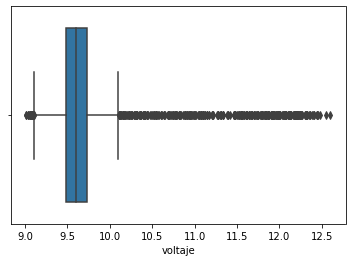

In [11]:
sns.boxplot(x = mediciones.voltaje)

La cantidad de outliers que aparecen es consistente con el resultado analitico? 

Hacer un scatterplot de voltaje vs tiempo para visualizar la señal de otra manera.

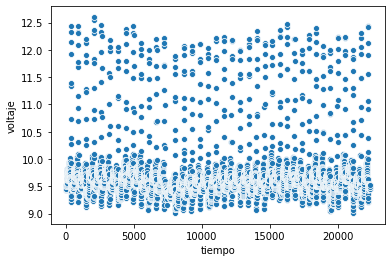

In [12]:
sns.scatterplot(mediciones.tiempo,mediciones.voltaje)

Hacer un plot con lineas del mismo grafico

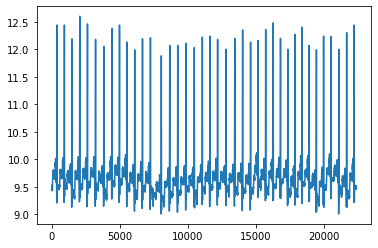

In [13]:
plt.plot(mediciones.tiempo,mediciones.voltaje)

Hacer un zoom del plot solo con los primeros 1000 datos

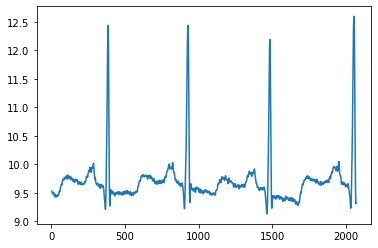

In [14]:
plt.plot(mediciones.tiempo[0:1000],mediciones.voltaje[0:1000])

### Electrocardiograma

Es un electrocardiograma!  

Los outliers son los picos de la señal. Hubiese sido incorrecto eliminarlos o corregir su valor.

Un dato util a extraer es el tiempo entre picos. La pregunta es como hacerlo.

Opciones:
* Filtrar el dataframe con un umbral de voltaje
    * Este metodo podria no ser preciso 
* Buscar los picos y luego el indice donde hay un maximo dentro de el
    * a veces conviene empezar a buscarlos manualmente y luego tratar de ir generalizando el metodo para llevarlo a un proceso automatico.

Este proceso es el mas trabajoso de este analisis. Hay que usar la imaginacion y la cabeza. :)



### Seleccion por umbral

Seleccionemos todos los puntos donde el voltaje supera un valor fijo

In [15]:
seleccion = mediciones.voltaje > 11.5

Creamos un nuevo dataframe con solo las filas que nos interesan

In [16]:
df2 = mediciones.loc[seleccion]

Veamos el plot de las primeras 50 filas

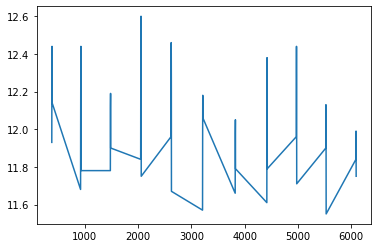

In [17]:
plt.plot(df2.tiempo[:50], df2.voltaje[:50], "-")

In [18]:
df2.head()

,tiempo,voltaje
183,380.689655,11.93
184,382.758621,12.32
185,384.827586,12.44
186,386.896552,12.14
444,920.689655,11.68


### Importo numpy (aunque deberia moverlo al principio)

In [19]:
import numpy as np

Voy a calcular el diff de los elementos de la columna tiempo.

Si tengo un array A = [a0, a1, a2, ...]

np.diff(A) es [a1-a0 , a2-a1 , a3-a2, ...]

es la resta entre un elemento y su inmediato anterior.

*Nota:* diff siempre devuelve un array con un elemento menos que el original.

In [20]:
deltaT = np.diff(df2.tiempo)

Veamos que resulta el diff de tiempo (ya filtrado y guardado en df2)

In [21]:
deltaT[:50]

array([  2.06896552,   2.06896552,   2.06896552, 533.79310345,
         2.06896552,   2.06896552,   2.06896552,   2.06896552,
         2.06896552, 548.27586207,   2.06896552,   2.06896552,
         2.06896552, 562.75862069,   2.06896552,   2.06896552,
         2.06896552,   2.06896552,   2.06896552, 558.62068966,
         2.06896552,   2.06896552,   2.06896552,   2.06896552,
       583.44827586,   2.06896552,   2.06896552,   2.06896552,
       606.20689655,   2.06896552,   2.06896552,   2.06896552,
       587.5862069 ,   2.06896552,   2.06896552,   2.06896552,
         2.06896552, 544.13793103,   2.06896552,   2.06896552,
         2.06896552,   2.06896552, 546.20689655,   2.06896552,
         2.06896552,   2.06896552, 558.62068966,   2.06896552,
         2.06896552, 564.82758621])

Se ve que hay varios que difieren en poco (2.1) y algunos que difieren en mucho (500+).

Este salto es el tiempo entre picos

In [22]:
picos = deltaT[deltaT>100]

Veamos si hay outliers en los tiempos entre picos

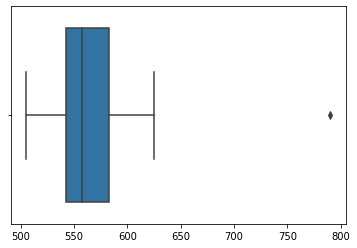

In [23]:
sns.boxplot(picos)

### Calculemos Latidos por Minuto

In [24]:
lxm = 60000/picos

In [25]:
lxm

array([112.40310078, 109.43396226, 106.61764706, 107.40740741,
       102.83687943,  98.97610922, 102.11267606, 110.2661597 ,
       109.84848485, 107.40740741, 106.22710623, 103.94265233,
        75.91623037,  97.97297297, 103.94265233, 100.69444444,
        98.97610922, 102.47349823, 109.02255639, 107.80669145,
        96.66666667,  96.02649007, 105.45454545, 104.31654676,
       110.6870229 , 109.02255639, 110.6870229 , 113.7254902 ,
       113.28125   , 113.7254902 , 118.85245902, 116.46586345,
       114.17322835, 115.53784861, 110.6870229 , 103.57142857,
       108.61423221, 109.84848485])

Veamos el histograma

(array([ 1.,  0.,  0.,  0.,  2.,  4.,  8., 11.,  9.,  3.]),
 array([ 75.91623037,  80.20985323,  84.5034761 ,  88.79709896,
         93.09072183,  97.38434469, 101.67796756, 105.97159042,
        110.26521329, 114.55883615, 118.85245902]),
 <a list of 10 Patch objects>)

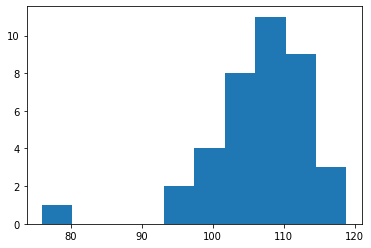

In [26]:
plt.hist(lxm)

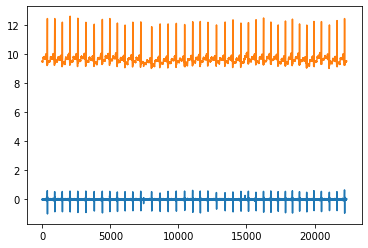

In [27]:
der = np.diff(mediciones.voltaje)
plt.plot(mediciones.tiempo[1:],der)
plt.plot(mediciones.tiempo,mediciones.voltaje)


# Moraleja

* Los outliers no necesariamente son puntos malos
* Siempre entender de donde provienen los datos y que representan
* Analizar los outliers en contexto
* Y a veces hay que transformar los datos para obtener datos utiles (latidos por minuto)

## Funciones para calcular Z-Score, Z-score modificado y IQR

Se proponen 3 funciones alternativas al comando 

In [28]:
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [29]:
import numpy as np

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)
#A further benefit of the modified Z-score method is that it uses the median and MAD rather 
#than the mean and standard deviation. The median and MAD are robust measures of central tendency and dispersion, 
#resp

In [30]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

**Resumen**

Diriamos que datos sucios, malos cálculos, son Outliers y se deberían remover pero al mismo tiempo puede ser que los queramos corregir también, porque inciden en las estimaciones de parámetros.

A través de este ejercicio vimos cómo en la fase de análisis de los datos podemos encontrarnos con datos inusuales (outliers). Aprendimos técnicas de detección y eliminación de outliers. Queda en discusión la pregunta sobre si es el camino correcto efectuar una eliminación de estos casos. Para responderla se dejan propuestas lecturas:

http://www.renc.es/imagenes/auxiliar/files/NUTR.%20COMUN.%20SUPL.%201-2015_Tratamiento%20atipicos.pdf

https://www.researchgate.net/post/When_is_it_justifiable_to_exclude_outlier_data_points_from_statistical_analyses

https://www.researchgate.net/post/Which_is_the_best_method_for_removing_outliers_in_a_data_set

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/